<a href="https://colab.research.google.com/github/SaraBabakN/hello-world/blob/master/resnet18_norm_layer4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import torch
import torchvision
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import matplotlib.pyplot as plt

train_set = torchvision.datasets.CIFAR10('./dataset', train=True, download=True,
                                         transform=transforms.Compose([transforms.ToTensor()]))


def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

0it [00:00, ?it/s]

170500096it [00:02, 70193806.36it/s]                               


Extracting ./dataset/cifar-10-python.tar.gz to ./dataset


In [0]:
network = models.resnet18(num_classes=10)

In [3]:
print (network)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
lr = 0.02
batch_size = 500
dataset_size = 50000
total_size = dataset_size // batch_size
epoch_num = 2
interval =20
input_array = 512

In [0]:
network = models.resnet18(num_classes=10)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
optimizer = optim.Adam(network.parameters(), lr=lr)

In [0]:
data_norm = np.zeros((total_size * epoch_num // interval + 1, input_array))
counter = 0
epsilon = 10e-7
x = 0

epoch 0 total_correct: 52 loss: 1249.9752044677734
epoch 0 total_correct: 105 loss: 5909.16633605957
epoch 0 total_correct: 151 loss: 8482.030153274536
epoch 0 total_correct: 216 loss: 10050.41790008545
epoch 0 total_correct: 275 loss: 11606.340646743774
epoch 0 total_correct: 339 loss: 13061.385989189148
epoch 0 total_correct: 406 loss: 15078.70638370514
epoch 0 total_correct: 483 loss: 16765.90597629547
epoch 0 total_correct: 563 loss: 18184.502243995667
epoch 0 total_correct: 627 loss: 19447.057843208313
epoch 0 total_correct: 697 loss: 20647.140979766846
epoch 0 total_correct: 779 loss: 21797.150135040283
epoch 0 total_correct: 868 loss: 22921.714544296265
epoch 0 total_correct: 951 loss: 24236.647963523865
epoch 0 total_correct: 1026 loss: 25425.84526538849
epoch 0 total_correct: 1096 loss: 26567.811846733093
epoch 0 total_correct: 1180 loss: 28056.209683418274
epoch 0 total_correct: 1258 loss: 29368.64984035492
epoch 0 total_correct: 1316 loss: 30520.466566085815
epoch 0 total_co

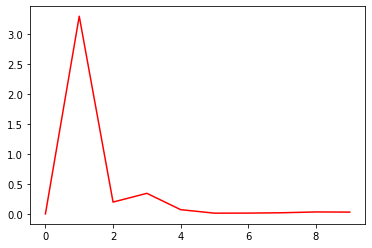

In [8]:
pre_net = torch.zeros((input_array, input_array*3*3))
param = torch.zeros((input_array, input_array*3*3))
lName ="layer4.0.conv1.weight"
for epoch in range(epoch_num):
    total_loss = 0
    total_correct = 0
    for batch in data_loader:
        images, labels = batch
        preds = network(images)
        loss = nn.functional.cross_entropy(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        if np.mod(counter, interval) == 0: 
            for layer_name, parameter in network.named_parameters():
                if layer_name== lName:
                    if x == 0:
                        pre_net = parameter.clone().detach().reshape(input_array,-1)
                    else :
                        param = parameter.reshape(input_array,-1)
                        data_norm[x] = np.divide(
                        np.linalg.norm((param - pre_net).clone().detach().numpy(), axis=1),
                        np.linalg.norm(pre_net.clone().detach().numpy(), axis=1) + epsilon)
                        pre_net = param.clone().detach()
                    break
            x = x + 1
        optimizer.step()
        total_loss += loss.item() * batch_size
        total_correct += get_num_correct(preds, labels)
        print(
            "epoch", epoch
            , "total_correct:", total_correct
            , "loss:", total_loss
        )
        counter += 1
times = range(x)
plt.plot(times, data_norm[times, 0], 'r')
fig_name = lName+'.png'
plt.savefig(fig_name)


In [0]:
import pandas as pd

for layer_name, parameter in network.named_parameters():
      df = pd.read_cvs(name+".csv")
      df.head()

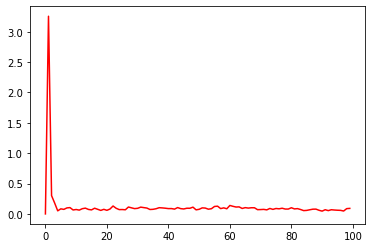

In [0]:
plt.plot(times, data_norm[times, 3], 'r')
fig_name = lName+'3.png'
plt.savefig(fig_name)

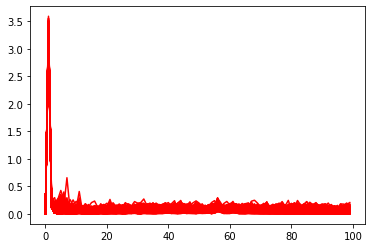

In [0]:
for i in range(input_array):
  plt.plot(times, data_norm[times, i], 'r')
  fig_name = 'layer4 0 conv1weight'+str(i)+'.png'
  plt.savefig(fig_name)

In [0]:
np.max(data_norm[2:input_array , :])


0.6575690507888794